<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

**INTRODUCTION:**

It is predicted that our global population will grow from 7.3 billion today to 9.7 billion by the year 2050. Finding solutions to feed the growing global population has become a pressing issue for agricultural and food organizations, entrepreneurs, and philanthropists.

These solutions range from changing the way we cultivate and raise our food to changing the way we eat. To make things more challenging, the Earth's climate is changing and is influenced by agriculture. As the world's population has expanded and become wealthier, the demand for food, energy, and water has seen a rapid increase.

Not only has demand increased for all three, but they are also heavily interconnected: food production requires water and energy; traditional energy production requires water resources; agriculture provides a potential source of energy and a significant amount of water.
 
 
**OBJECTIVE:** 

Starting from the data related to the world production and distribution of food and feed, I am going to analyze the negative impact they have on the environment. I will perform an exploratory data analysis (EDA) with these datasets to identify the key factors that contribute to this impact.

**DATASETS AVAILABLE:**

This dataset on the Kaggle website (https://www.kaggle.com/datasets/dorbicycle/world-foodfeed-production) ↗), gives an overview of our global food production, focusing on a comparison between food produced for human consumption and feed produced for animals.

This dataset is made available by the United Nations Organization, which provides free access to data on food and agriculture for over 245 countries and territories (the csv file named 'FAOSTAT_data_3-24-2022' attached to the track), from the year 1961 to the most recent update.

The third useful dataset useful dataset is available at this link (https://www.kaggle.com/selfvivek/environment-impact-of-food-production) ↗). It contains the 43 most commonly grown foods worldwide and 23 columns describing values such as water usage and greenhouse gas emissions.

In [1]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')

#from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import MaxAbsScaler
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
#Import .csv files

fao_raw = pd.read_csv('FAO.csv', encoding='latin1')
#faostat_raw = pd.read_csv('../input/faostat/FAOSTAT_data_3-24-2022.csv')
fp_raw = pd.read_csv('Food_Production.csv')

In [3]:
fao_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area Abbreviation  21477 non-null  object 
 1   Area Code          21477 non-null  int64  
 2   Area               21477 non-null  object 
 3   Item Code          21477 non-null  int64  
 4   Item               21477 non-null  object 
 5   Element Code       21477 non-null  int64  
 6   Element            21477 non-null  object 
 7   Unit               21477 non-null  object 
 8   latitude           21477 non-null  float64
 9   longitude          21477 non-null  float64
 10  Y1961              17938 non-null  float64
 11  Y1962              17938 non-null  float64
 12  Y1963              17938 non-null  float64
 13  Y1964              17938 non-null  float64
 14  Y1965              17938 non-null  float64
 15  Y1966              17938 non-null  float64
 16  Y1967              179

In [4]:
#faostat_raw.info()

In [5]:
fp_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

In [6]:
fao_raw.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [7]:
#faostat_raw.head()

In [8]:
fp_raw.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


In [9]:
#Heat map Correlation matrix

#fig = px.imshow(fp_raw.corr(),x=list(fp_raw.corr().columns),y=list(fp_raw.corr().columns),width=1000, height=1000)
#fig.show()

### Data Cleaning

In [10]:
#fao_raw data cleaning

fao_raw = fao_raw.drop(['Area Abbreviation','Area Code','Item Code','Element Code','Unit'], axis=1) #remove unused columns

In [11]:
fao_raw = fao_raw.drop_duplicates(subset=['Area','Item','Element','Y2013'], keep='first') #drop duplicate rows

In [12]:
fao = fao_raw.fillna(0) #replace NA with 0

In [13]:
fao.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21018 entries, 0 to 21476
Data columns (total 58 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       21018 non-null  object 
 1   Item       21018 non-null  object 
 2   Element    21018 non-null  object 
 3   latitude   21018 non-null  float64
 4   longitude  21018 non-null  float64
 5   Y1961      21018 non-null  float64
 6   Y1962      21018 non-null  float64
 7   Y1963      21018 non-null  float64
 8   Y1964      21018 non-null  float64
 9   Y1965      21018 non-null  float64
 10  Y1966      21018 non-null  float64
 11  Y1967      21018 non-null  float64
 12  Y1968      21018 non-null  float64
 13  Y1969      21018 non-null  float64
 14  Y1970      21018 non-null  float64
 15  Y1971      21018 non-null  float64
 16  Y1972      21018 non-null  float64
 17  Y1973      21018 non-null  float64
 18  Y1974      21018 non-null  float64
 19  Y1975      21018 non-null  float64
 20  Y1976      

### Data Visualisation

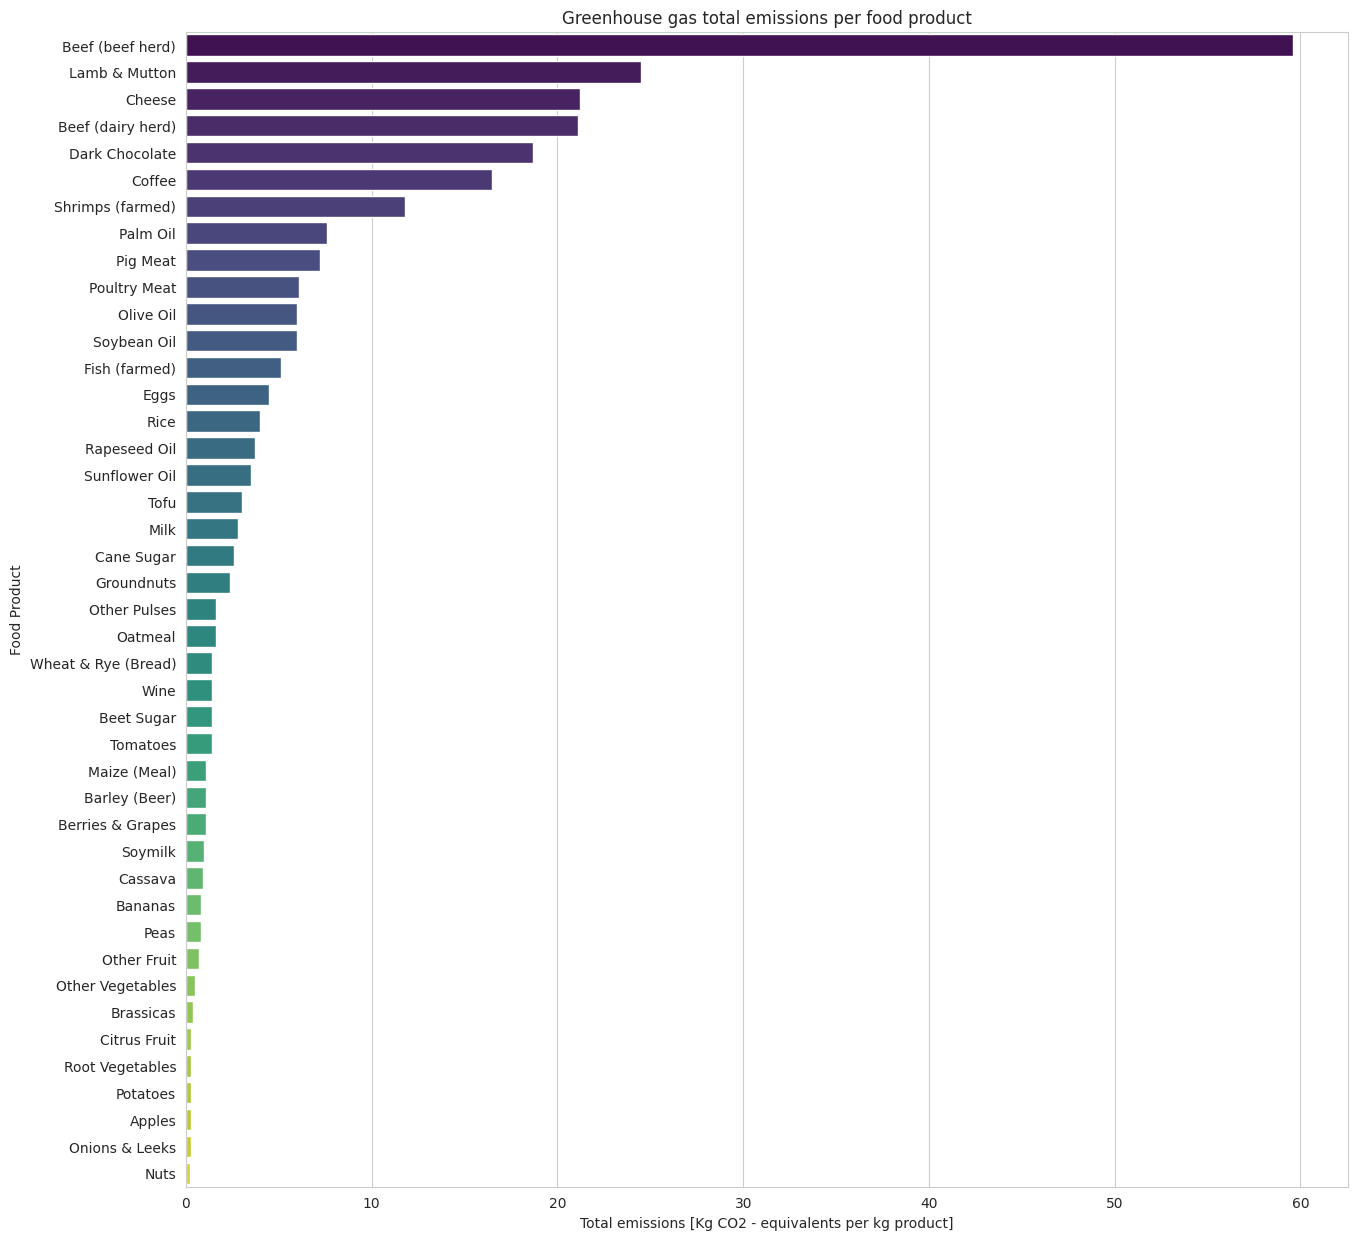

In [14]:
#Greenhouse gas total emissions per food product barplot

sns.set_style('whitegrid')
plt.figure(figsize = (15,15))

# Sort the table
data1 = fp_raw.sort_values(by=['Total_emissions'], ascending=False)

#Barplot
sns.barplot(x='Total_emissions', y='Food product', data=data1, orient='h', palette='viridis')
plt.xlabel('Total emissions [Kg CO2 - equivalents per kg product]');
plt.ylabel('Food Product');
plt.title('Greenhouse gas total emissions per food product');

# show the plot
plt.show()

The 10 foods with the greatest environmental impact in terms of total CO2 equivalent emissions are, in descending order, beef, lamb and mutton, cheese, dairy products from cow's milk, dark chocolate, coffee, farmed shrimp, palm oil, pork and chicken. Considering the entire product life cycle, beef produces CO2 equivalent emissions +143% compared to lamb or mutton, +727% compared to pork and +877% compared to chicken.

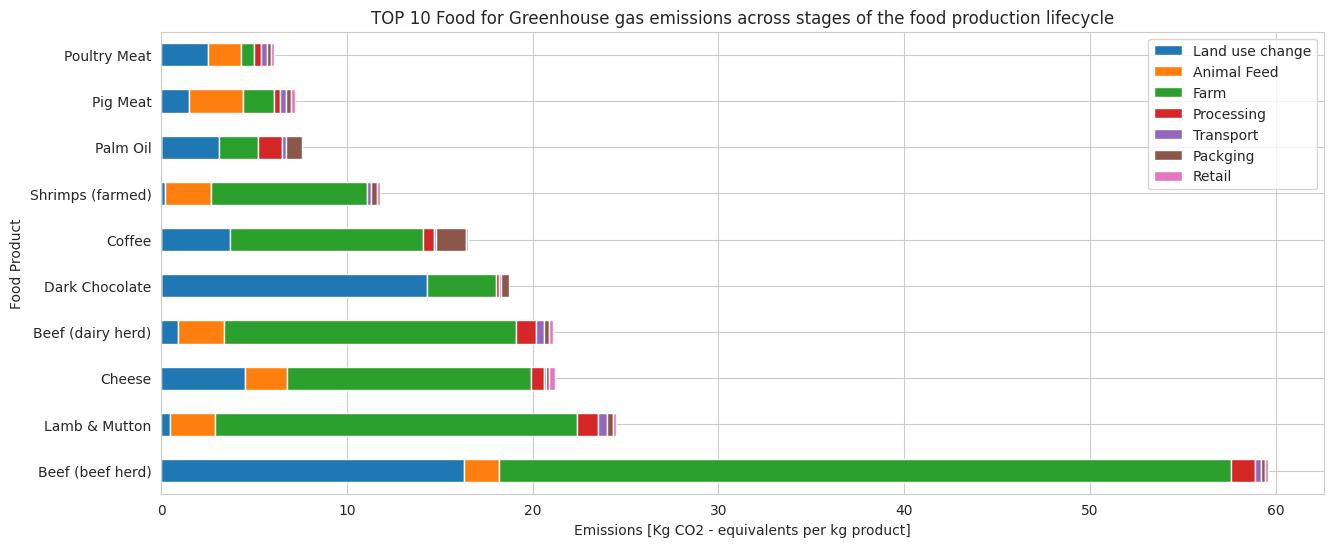

In [15]:
#TOP10 Food for greenhouse gas emissions across stages of food production lifecyle barplot

# Sort the table
data2 = fp_raw.sort_values(by=['Total_emissions'], ascending=False)
data2 = data2.iloc[0:10, 0:8]
data2.plot.barh(figsize=(15,6),stacked=True)

# set the y-axis tick labels
plt.yticks(range(10), data2['Food product'][0:10])

# set the title and labels for the plot
plt.xlabel('Emissions [Kg CO2 - equivalents per kg product]')
plt.ylabel('Food Product')
plt.title('TOP 10 Food for Greenhouse gas emissions across stages of the food production lifecycle')

# turn on the grid lines
plt.grid(True)

# show the plot
plt.show()

The most significant environmental impact in terms of CO2 equivalent in the life cycle of beef is due to methane emissions from cows, methane from rice, fertilizer emissions, manure and machinery. It is interesting to note that not for all foods the contribution linked to the farm is so significant. For example, in the case of chocolate production, the consumption of land in terms of deforestation and variations in the carbon level in the soil is more impactful.

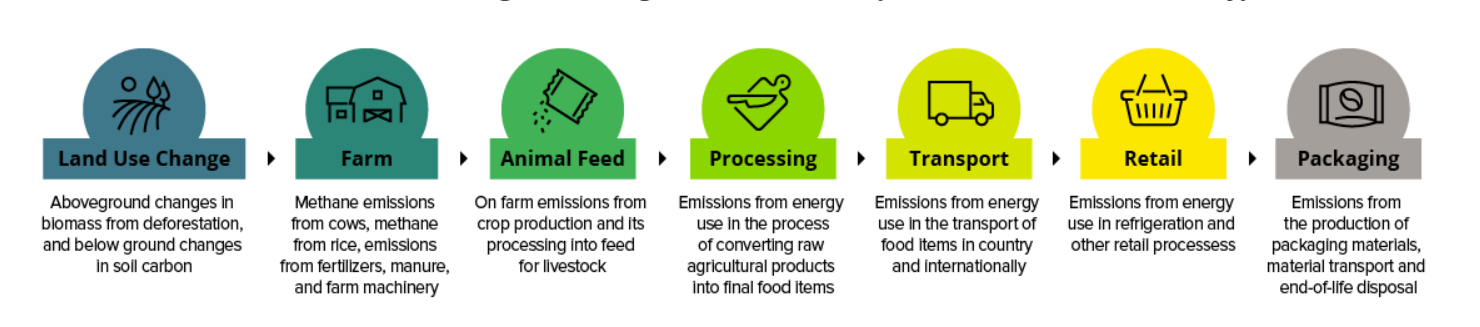

**Source:** https://www.visualcapitalist.com/visualising-the-greenhouse-gas-impact-of-each-food/

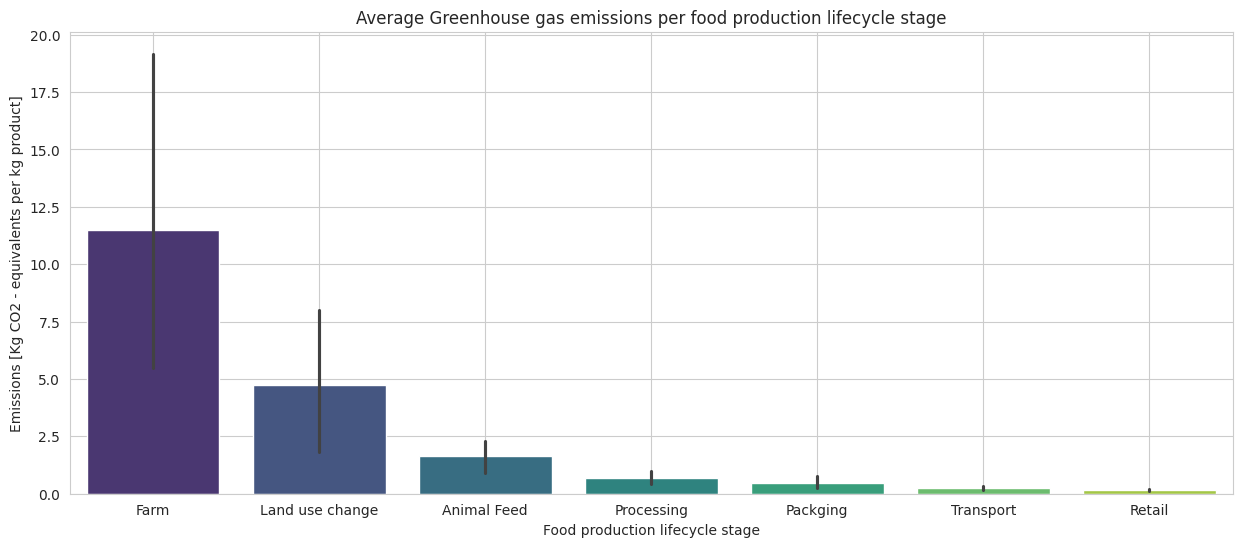

In [16]:
#Average Greenhouse gas emissions per food prodcution lifecycle stage

sns.set_style('whitegrid')
plt.figure(figsize = (15,6))

data3 = data2.reindex(data2.mean(numeric_only=True).sort_values(ascending=False).index, axis=1)

#barplot
sns.barplot(data=data3, palette='viridis')

plt.xlabel('Food production lifecycle stage')
plt.ylabel('Emissions [Kg CO2 - equivalents per kg product]')
plt.title('Average Greenhouse gas emissions per food production lifecycle stage')
plt.grid(True)

plt.show()

As seen in the previous graph, the predominant contribution in the life cycle of food products is due to the impact of the farm. This is generally more evident in the case of animal products (meat, dairy products).

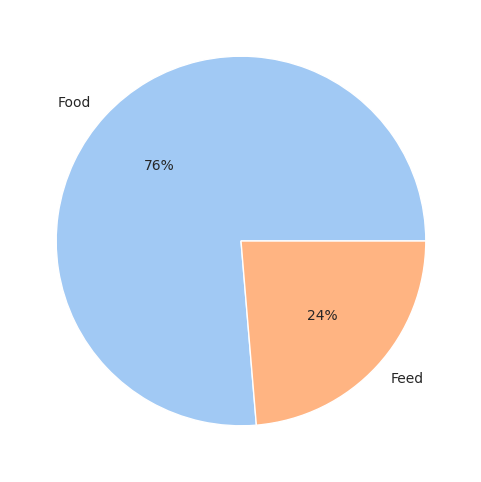

In [17]:
#Food or Feed?

data4 = fao.groupby('Element').sum()
data4 = data4.iloc[:,2:58].sort_values(by=['Y2013'], ascending=False).T.sum()

plt.figure(figsize = (15,6))

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#define labels
labels = ['Food','Feed']

#create pie chart
plt.pie(data4, labels=labels, colors = colors, autopct='%.0f%%')
plt.show()

From 1961 to 2013, 76% of the world's food production was consumed by humans, while the remaining 24% was used for animal feed.

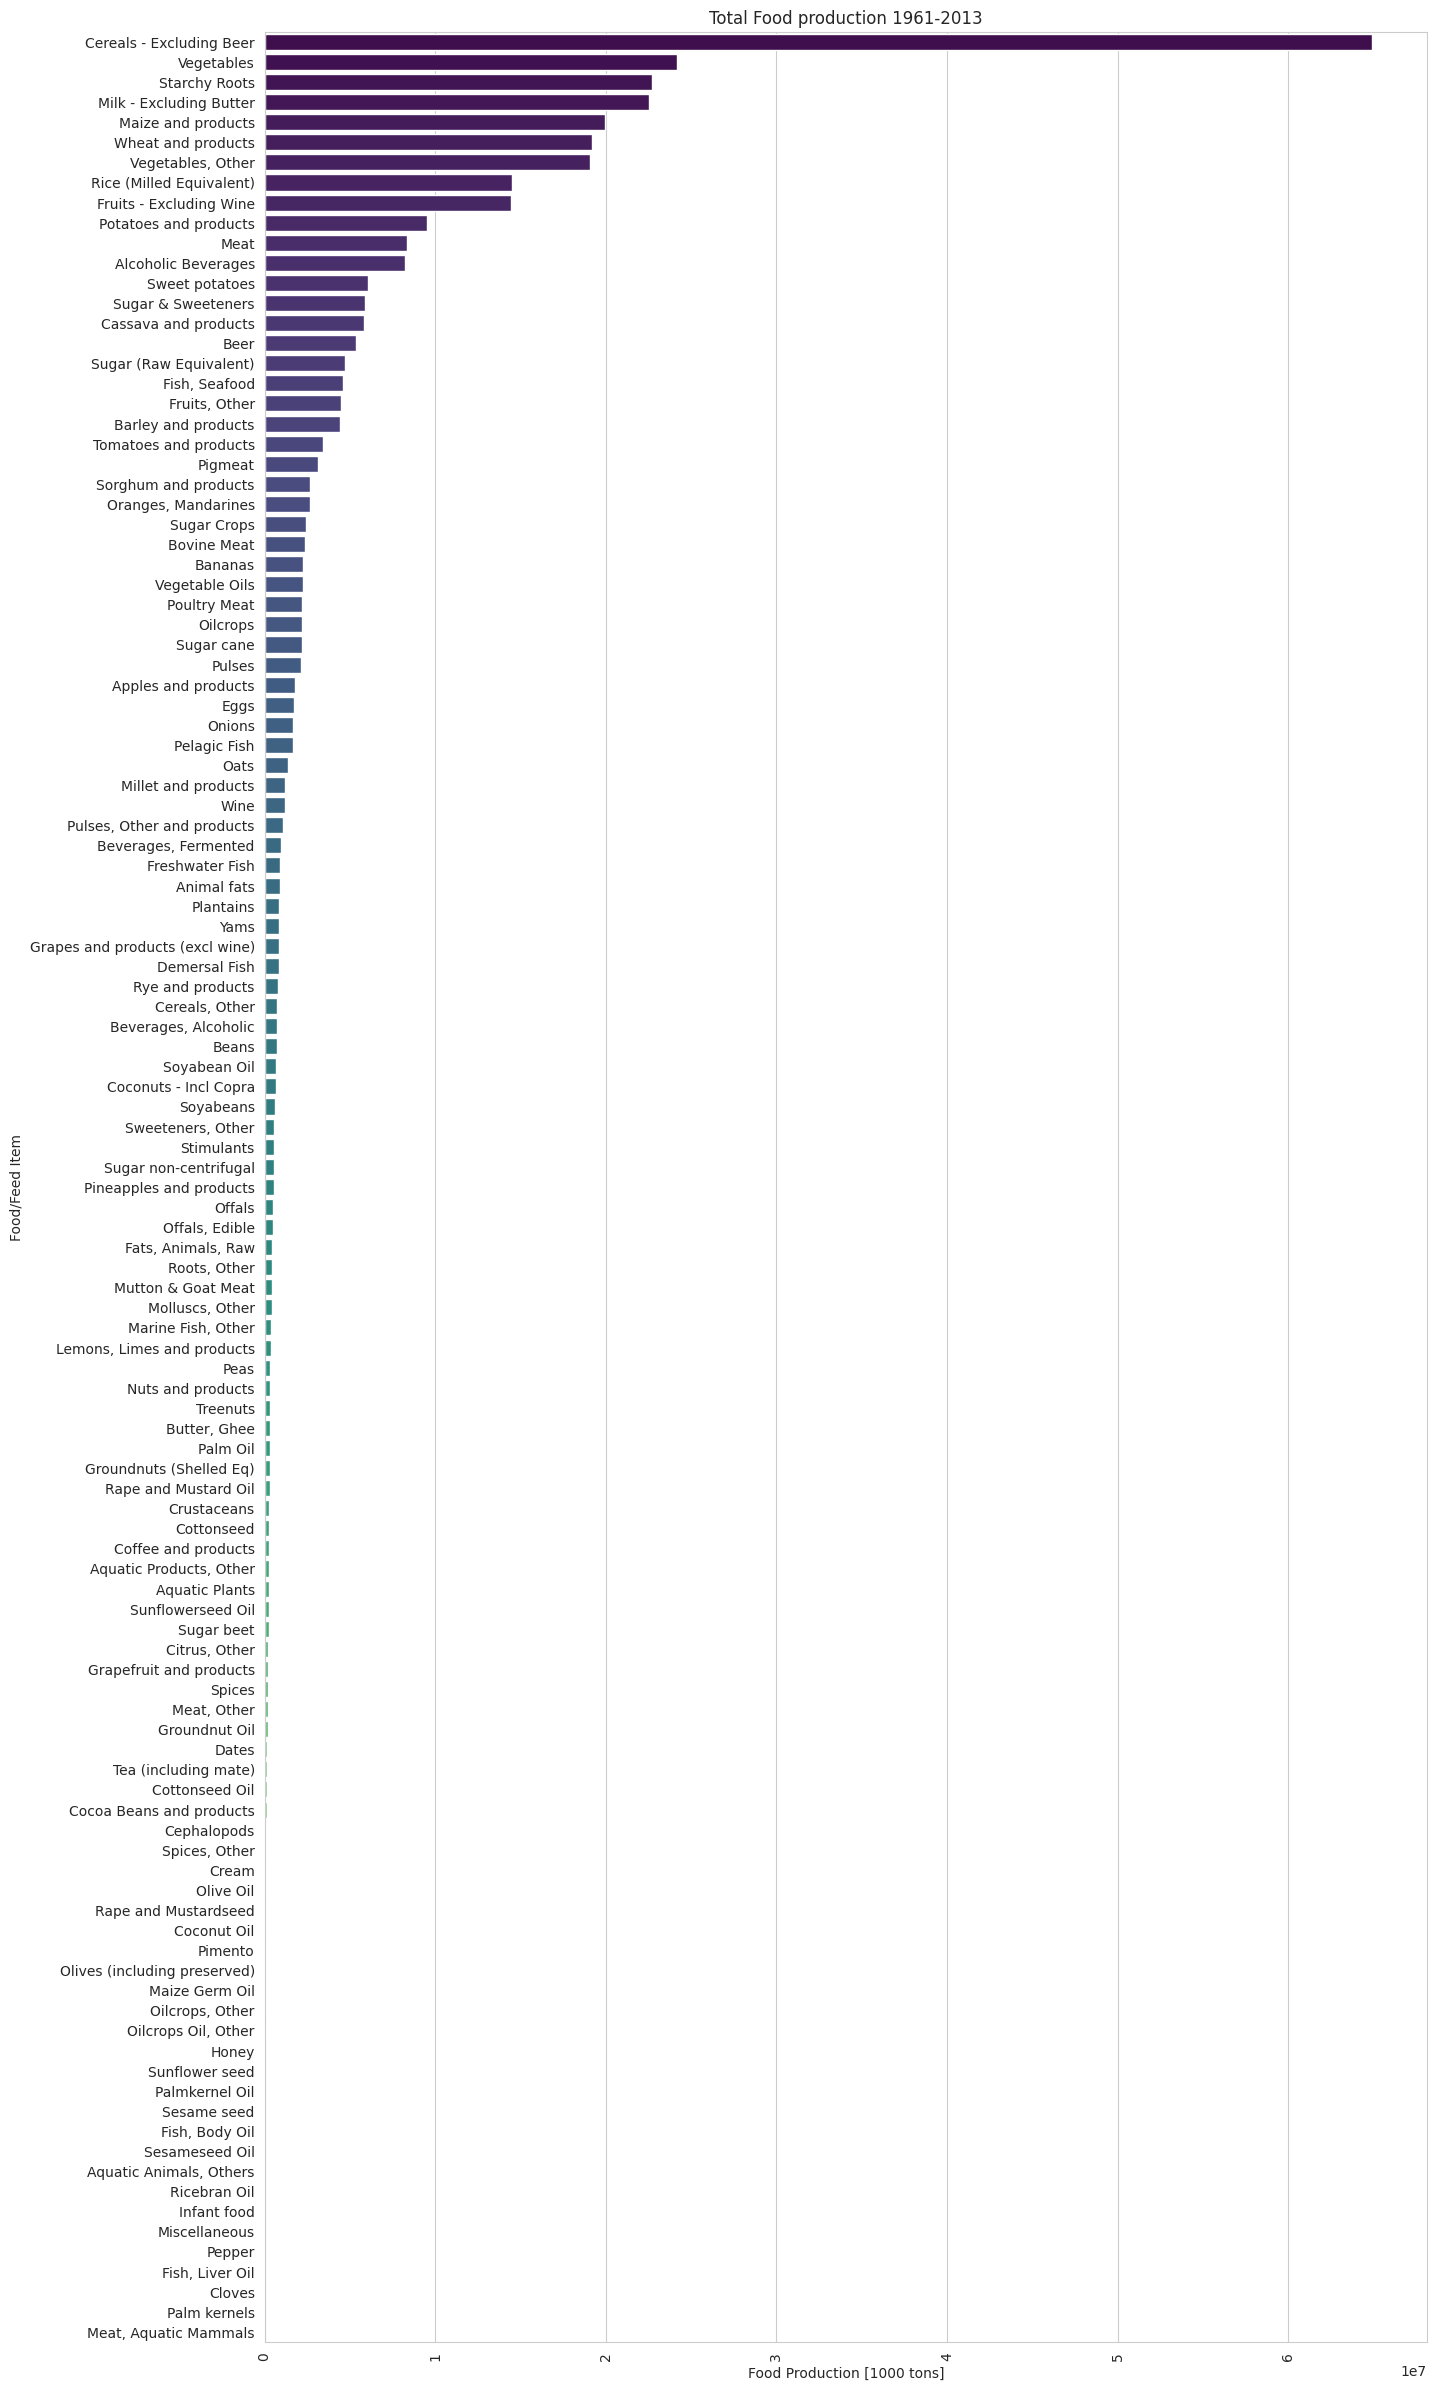

In [18]:
#Total food production 1961-2013 barplot

data5 = fao.groupby('Item').sum().T
data5 = data5.drop(['latitude', 'longitude','Area','Element'],axis = 0)
data5 = data5.sum().sort_values(ascending=False)

df = pd.DataFrame(data5, columns=['total'])
df.reset_index(inplace=True)
plt.figure(figsize = (15,30))

#barplot
sns.set_style('whitegrid')
sns.barplot(x='total', y='Item', data=df, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Food Production [1000 tons]')
plt.ylabel('Food/Feed Item')
plt.title('Total Food production 1961-2013')

plt.show()

The foods produced worldwide in the greatest quantities, from 1961 to 2013, are of plant origin (cereals, vegetables, tubers, milk, corn, wheat, rice, fruit, potatoes) except for milk which is of animal origin.

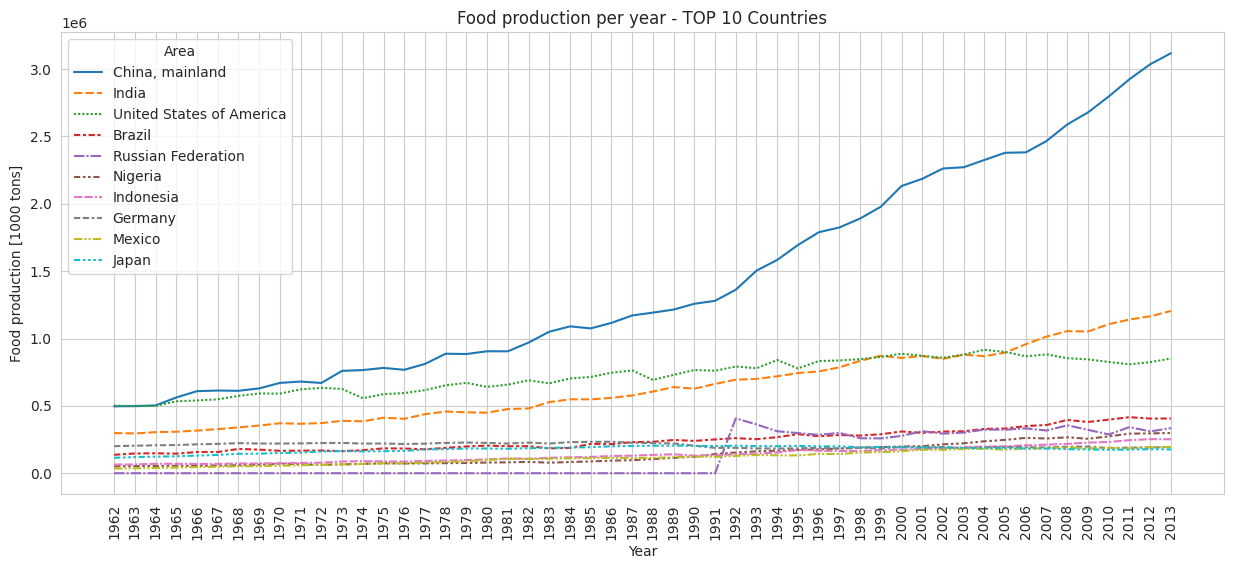

In [19]:
# Food production per year - TOP 10 Countries plot

data6 = fao.groupby('Area').sum()
data6 = data6.iloc[:,5:58].sort_values(by=['Y2013'], ascending=False).T
data6.index = data6.index.str.slice(1)

sns.set_style('whitegrid')
plt.figure(figsize = (15,6))

#lineplot
sns.lineplot(data=data6.iloc[:,0:10])

# set x-axis label rotation
plt.xticks(rotation=90)

plt.xlabel('Year')
plt.ylabel('Food production [1000 tons]')
plt.title('Food production per year - TOP 10 Countries')
plt.grid(True)

plt.show()

The graph shows the production of food from 1961 to 2013 for the 10 largest producing countries. China dominates production with over 3 billion tonnes in 2013, India is in second place with over 1 billion tonnes and the United States is in third place with less than 1 billion tonnes of food produced.

In [20]:
#Food production world map in 1961

food_prod = fao.groupby('Area').sum()

# Create the choropleth map
fig = px.choropleth(food_prod, 
                    locations=food_prod.index, 
                    locationmode='country names',
                    color='Y1961', 
                    range_color=[food_prod['Y1961'].min(), food_prod['Y1961'].max()], 
                    color_continuous_scale=px.colors.sequential.Plasma, 
                    title='World Food Production in 1961 [1000 tons]')

# Update the layout and configuration
fig.update_layout(
    height=800,
    width=900,
    title_x=0.5,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'),)

# Show the figure
fig.show()

In [21]:
#Food production world map in 2013

food_prod = fao.groupby('Area').sum()

# Create the choropleth map
fig = px.choropleth(food_prod, 
                    locations=food_prod.index, 
                    locationmode='country names',
                    color='Y2013', 
                    range_color=[food_prod['Y2013'].min(), food_prod['Y2013'].max()], 
                    color_continuous_scale=px.colors.sequential.Plasma, 
                    title='World Food Production in 2013 [1000 tons]')

# Update the layout and configuration
fig.update_layout(
    height=800,
    width=900,
    title_x=0.5,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'),)

# Show the figure
fig.show()

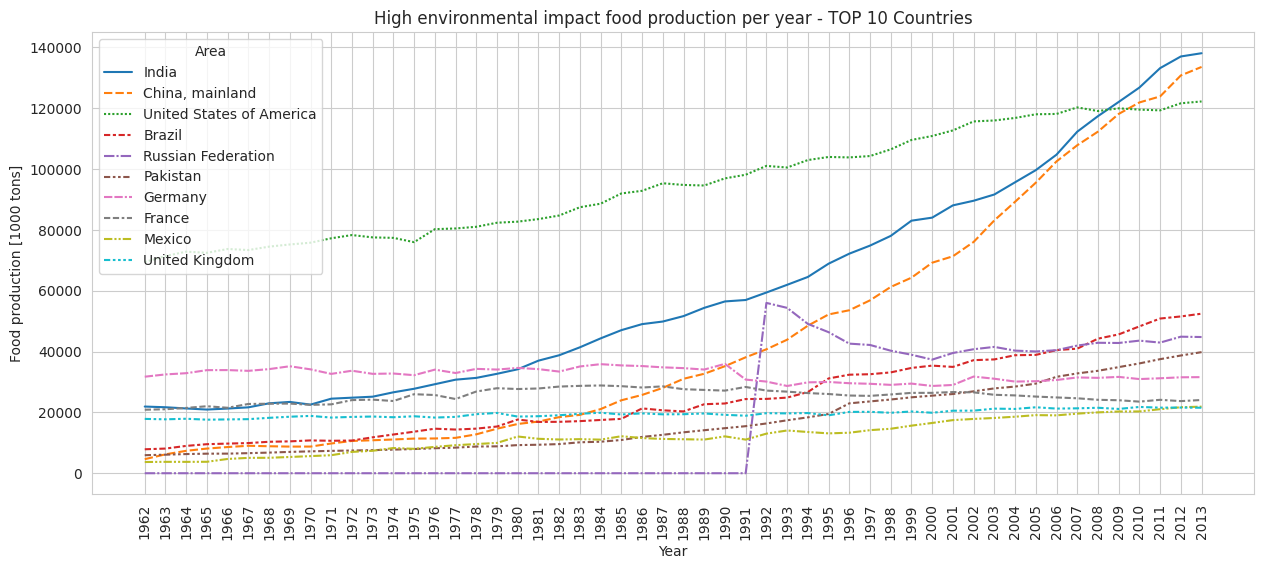

In [22]:
#High environmental impact food production per year - TOP 10 countries plot

data7 = fao[(fao['Item'] == 'Palm Oil') | 
        (fao['Item'] == 'Coffee and products') | (fao['Item'] == 'Cocoa beans and products')
       | (fao['Item'] == 'Bovine Meat') | (fao['Item'] == 'Mutton and Goat Meat')
       | (fao['Item'] == 'Poultry Meat') | (fao['Item'] == 'Pigmeat')
       | (fao['Item'] == 'Milk - Excluding Butter') | (fao['Item'] == 'Crustaceans')
       | (fao['Item'] == 'Butter, Ghee')].groupby('Area').sum()

data7 = data7.iloc[:,5:58].sort_values(by=['Y2013'], ascending=False).T
data7.index = data7.index.str.slice(1)

sns.set_style('whitegrid')
plt.figure(figsize = (15,6))

#lineplot
sns.lineplot(data=data7.iloc[:,0:10])

# set x-axis label rotation
plt.xticks(rotation=90)

plt.xlabel('Year')
plt.ylabel('Food production [1000 tons]')
plt.title('High environmental impact food production per year - TOP 10 Countries')
plt.grid(True)

plt.show()

The graph shows the production of the 10 foods with the highest environmental impact in terms of CO2 equivalent emissions per country. India, China and the United States are always the three largest producers, but unlike the previous graph (Food Production per Year - TOP 10 countries), India and the United States have a greater impact on the production of foods that are more harmful to the greenhouse effect.

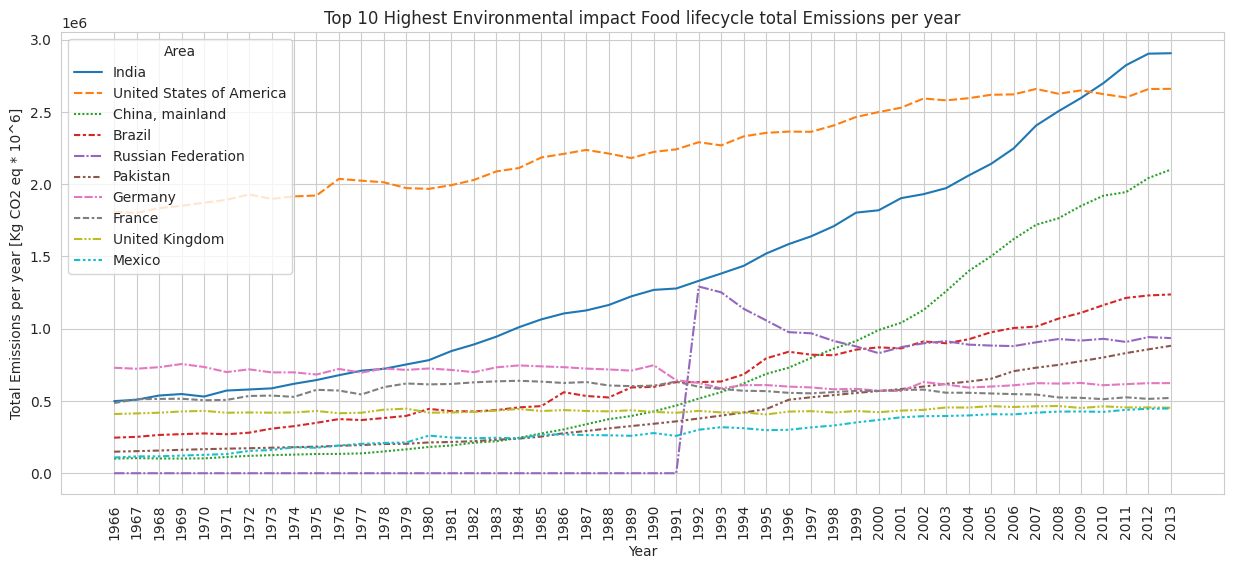

In [23]:
# Top 10 Highest Environmental impact Food lifecycle total Emissions per year plot

# create a list of our conditions
conditions = [(fao['Item'] == 'Bovine Meat'),
                (fao['Item'] == 'Mutton & Goat Meat'),
                (fao['Item'] == 'Butter, Ghee'),
                (fao['Item'] == 'Milk - Excluding Butter'),
                (fao['Item'] == 'Cocoa Beans and products'),
                (fao['Item'] == 'Coffee and products'),
                (fao['Item'] == 'Crustaceans'),
                (fao['Item'] == 'Palm Oil'),
                (fao['Item'] == 'Pigmeat'),
                (fao['Item'] == 'Poultry Meat')]

# create a list of the values we want to assign for each condition
values = [59.6, 24.5, 21.2, 21.1, 18.7, 16.5, 11.8, 7.6, 7.2, 6.1]

# create a new column and use np.select to assign values to it using our lists as arguments
fao['emissions'] = np.select(conditions, values)

data8 = fao.iloc[:,10:-1].T
data8.index = data8.index.str.slice(1)
data8 = data8.T
fao_emissions = data8.multiply(fao['emissions'], axis='index')

fao_emissions.set_index(fao['Area'], inplace=True)
fao_emissions = fao_emissions.groupby('Area').sum()
fao_emissions = fao_emissions.sort_values(by=['2013'], ascending=False).T

sns.set_style('whitegrid')
plt.figure(figsize = (15,6))

sns.lineplot(data=fao_emissions.iloc[:,0:10])

# set x-axis label rotation
plt.xticks(rotation=90)

plt.xlabel('Year')
plt.ylabel('Total Emissions per year [Kg CO2 eq * 10^6]')
plt.title('Top 10 Highest Environmental impact Food lifecycle total Emissions per year')
plt.grid(True)
plt.show()

The graph above shows the total CO2 equivalent emissions per year and producing country. As in the previous graph (High environmental impact food production per year - TOP 10 Countries), India and the United States have a more marked dominance than China.

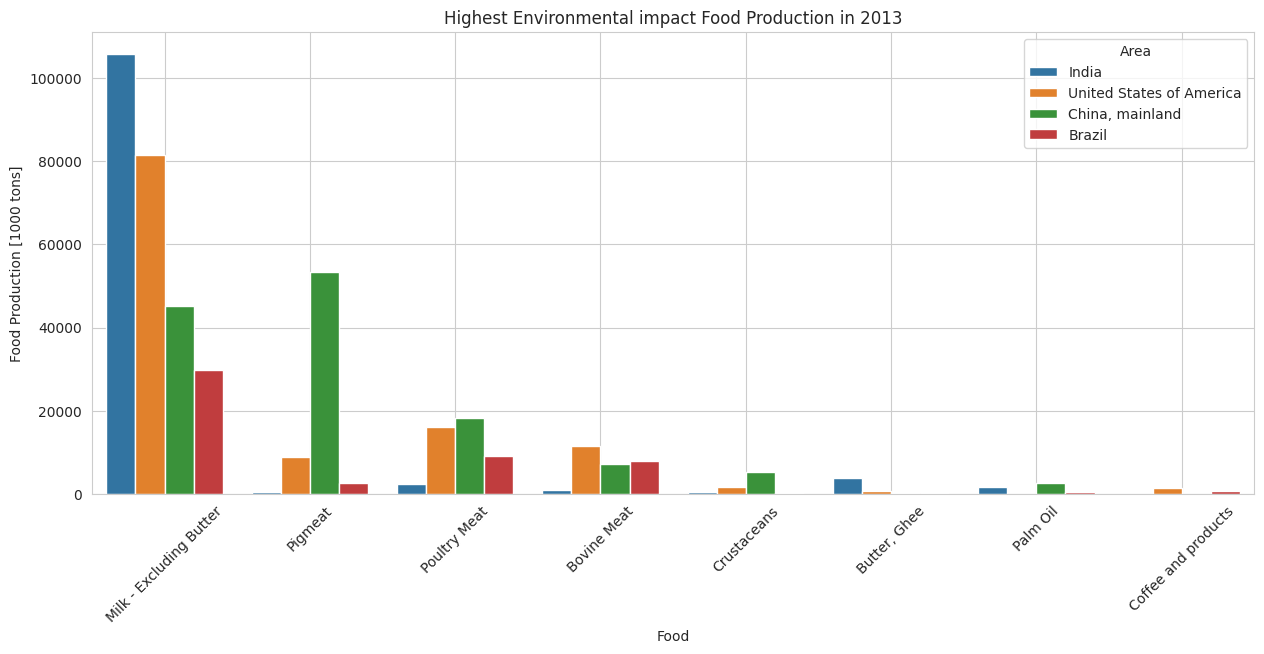

In [25]:
#Highest Environmental Impact Food Production in 2013 barplot

data9 = fao[((fao['Item'] == 'Palm Oil') | (fao['Item'] == 'Coffee and products') 
                 | (fao['Item'] == 'Cocoa beans and products')
                 | (fao['Item'] == 'Bovine Meat') | (fao['Item'] == 'Mutton and Goat Meat')
                 | (fao['Item'] == 'Poultry Meat') | (fao['Item'] == 'Pigmeat')
                 | (fao['Item'] == 'Milk - Excluding Butter') | (fao['Item'] == 'Crustaceans')
                 | (fao['Item'] == 'Butter, Ghee')) & ((fao['Area'] == 'India') | (fao['Area'] == 'China, mainland') 
                 | (fao['Area'] == 'United States of America') | (fao['Area'] == 'Brazil')) & (fao['Element'] == 'Food')].sort_values(by=['Y2013'], ascending=False)

data9 = data9.drop_duplicates(subset=['Item','Element','Y2013'], keep='first')

sns.set_style('whitegrid')
plt.figure(figsize = (15,6))

sns.barplot(data=data9, x='Item', y='Y2013', hue='Area')

# set x-axis label rotation
plt.xticks(rotation=45)

plt.xlabel('Food')
plt.ylabel('Food Production [1000 tons]')
plt.title('Highest Environmental impact Food Production in 2013')
plt.grid(True)
plt.show()

The bar chart above shows the food production with the highest CO2 equivalent emissions for the four largest producing nations in the world. It is interesting to note that India is the largest producer of cow's milk, but the meat production is very low compared to the United States, which is the largest producer of beef. China, on the other hand, is the largest producer of pork, which is less harmful to the environment than beef.